In [41]:
import torch
from torch import nn

import math
import matplotlib.pyplot as plt

In [42]:
torch.manual_seed(111)

# Preparing data

In [43]:
train_data_length = 1024
train_data = torch.zeros((train_data_length, 2))
train_data[:, 0] = 2 * math.pi * torch.rand(train_data_length)
train_data[:, 1] = torch.sin(train_data[:, 0])
train_labels = torch.zeros(train_data_length)
train_set = [
    (train_data[i], train_labels[i]) for i in range(train_data_length)
]

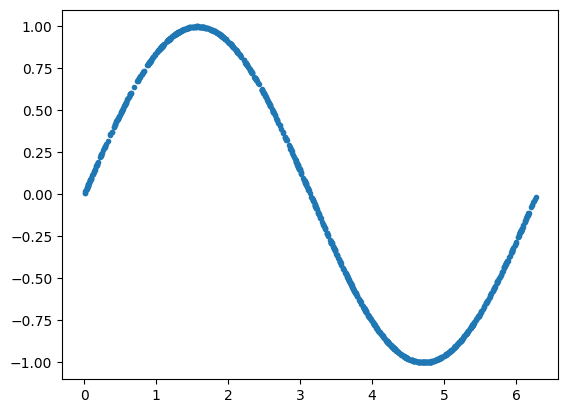

In [44]:
plt.plot(train_data[:, 0], train_data[:, 1], ".")

In [45]:
batch_size = 32
train_loader = torch.utils.data.DataLoader(
    train_set, batch_size=batch_size, shuffle=True
)

# Building the GAN

## Discriminator

In [46]:
class Discriminator(nn.Module):
    def __init__(self):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(2, 256),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(256, 128),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(64, 1),
            nn.Sigmoid(),
        )

    def forward(self, x):
        output = self.model(x)
        return output

In [47]:
discriminator = Discriminator()

## Generator

In [48]:
class Generator(nn.Module):
    def __init__(self):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(2, 16),
            nn.ReLU(),
            nn.Linear(16, 32),
            nn.ReLU(),
            nn.Linear(32, 2),
        )

    def forward(self, x):
        output = self.model(x)
        return output

In [49]:
generator = Generator()

# Training

epoch=0, loss_discriminator.item()=0.19529837369918823, loss_generator.item()=1.9121708869934082


epoch=60, loss_discriminator.item()=0.703983724117279, loss_generator.item()=0.761984646320343
epoch=120, loss_discriminator.item()=0.6394660472869873, loss_generator.item()=0.7447249889373779
epoch=180, loss_discriminator.item()=0.6908673048019409, loss_generator.item()=0.7901670336723328
epoch=240, loss_discriminator.item()=0.6164445281028748, loss_generator.item()=0.8495702743530273


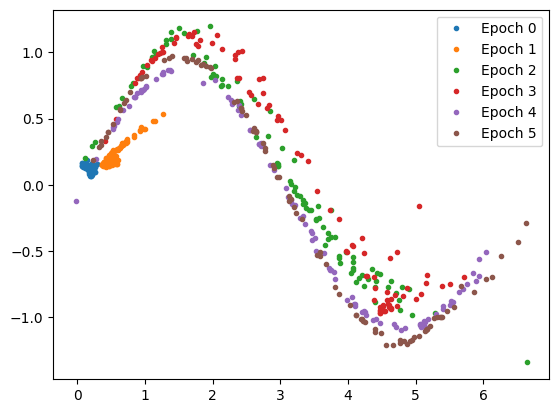

In [50]:
# Meta parameters
learning_rate = 0.001
number_of_epochs = 300
loss_function = nn.BCELoss()

# Optimizations
optimizer_discriminator = torch.optim.Adam(discriminator.parameters(), lr=learning_rate)
optimizer_generator = torch.optim.Adam(generator.parameters(), lr=learning_rate)

per_epoch_predictions = []

latent_space_samples = torch.randn(100, 2)
generated_samples = generator(latent_space_samples).detach()
plt.plot(generated_samples[:, 0], generated_samples[:, 1], ".")
per_epoch_predictions.append(generated_samples[:, 0])

# Training loop
for epoch in range(number_of_epochs):
    for n, (real_samples, _) in enumerate(train_loader):
        # Data for training the discriminator
        real_samples_labels = torch.ones((batch_size, 1))
        latent_space_samples = torch.randn((batch_size, 2))
        generated_samples = generator(latent_space_samples)
        generated_samples_labels = torch.zeros((batch_size, 1))
        all_samples = torch.cat((real_samples, generated_samples))
        all_samples_labels = torch.cat(
            (real_samples_labels, generated_samples_labels)
        )

        # Training the discriminator
        discriminator.zero_grad()
        output_discriminator = discriminator(all_samples)
        loss_discriminator = loss_function(
            output_discriminator, all_samples_labels)
        loss_discriminator.backward()
        optimizer_discriminator.step()

        # Data for training the generator
        latent_space_samples = torch.randn((batch_size, 2))

        # Training the generator
        generator.zero_grad()
        generated_samples = generator(latent_space_samples)
        output_discriminator_generated = discriminator(generated_samples)
        loss_generator = loss_function(
            output_discriminator_generated, real_samples_labels
        )
        loss_generator.backward()
        optimizer_generator.step()

        # Show loss
        if epoch % 60 == 0 and n == batch_size - 1:
            print(f"{epoch=}, {loss_discriminator.item()=}, {loss_generator.item()=}")
            # Random new samples to visualise progress over epochs
            latent_space_samples = torch.randn(100, 2)
            generated_samples = generator(latent_space_samples).detach()
            plt.plot(generated_samples[:, 0], generated_samples[:, 1], ".")
            per_epoch_predictions.append(generated_samples[:, 0])


plt.legend([f"Epoch {epoch_index}" for epoch_index in range(len(per_epoch_predictions))])